In [205]:
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
df = pd.read_csv('input/train.csv')

In [207]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = pd.to_datetime(df['datetime']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['datetime']).dt.strftime('%m')
df['day'] = pd.to_datetime(df['datetime']).dt.strftime('%d')
df['weekday'] = pd.to_datetime(df['datetime']).dt.strftime('%a')
df['hour'] = pd.to_datetime(df['datetime']).dt.strftime('%H')

In [208]:
X = df.loc[:,["temp",'humidity',"hour",'hour']].values
# X = df.loc[:,["temp"]].values
y = df.loc[:,["count"]].values

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [210]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
  
#ElasticNet
clf = ElasticNet(alpha = 0.5).fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
print(mse)
y_pred = clf.predict(scaler.transform(X_test))

[ 7.85477238 -2.00342449  7.69300014]
[67.23209434]
22853.56594196735


In [211]:
# #Lasso回帰
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LassoCV
# from sklearn.metrics import mean_squared_error

# scaler = StandardScaler()
# clf = Lasso(alpha=10) #正則化パラメータ

# scaler.fit(X_train)
# clf.fit(scaler.transform(X_train), y_train)

# y_pred = clf.predict(scaler.transform(X_test))
# mse = mean_squared_error(y_test, y_pred)

# # print(clf.alpha_)
# print(clf.coef_)
# print(clf.intercept_)
# print(mse)

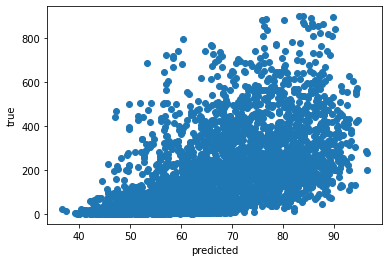

In [212]:
from matplotlib import pyplot as plt
plt.scatter(y_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [213]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5
print("test: ",rmsle(y_test, clf.predict(X_test)))
print("train: ",rmsle(y_train, clf.predict(X_train)))

test:  [1.18673696]
train:  [1.1921663]


In [214]:
y_t = pd.DataFrame(y_train)
y_t.describe()

,0
count,7620.000000
mean,190.349869
std,181.530697
min,1.000000
25%,42.000000
50%,141.000000
75%,283.000000
max,977.000000


In [215]:
y_p = pd.DataFrame(y_pred)
y_p.describe()

,0
count,3266.000000
mean,67.457972
std,12.407810
min,36.675059
25%,57.807916
50%,67.556178
75%,77.207499
max,96.396058
